In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction. text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.feature_extraction. text import TfidfVectorizer

from sklearn.svm import SVC

import pickle

In [2]:
#reading the csv data

df =pd.read_csv("C:/Users/gopal/Downloads/archive/gold-dataset-sinha-khandait.csv") 
df


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [3]:
df.shape

(10570, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [5]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [6]:
df['Price Sentiment'].value_counts()

Price Sentiment
positive    4412
negative    3814
none        1968
neutral      376
Name: count, dtype: int64

In [7]:
df['Price Sentiment'].unique()

array(['negative', 'positive', 'none', 'neutral'], dtype=object)

In [8]:
df['Price Sentiment']=df['Price Sentiment'].map({'negative': 1, 'positive':2, 'neutral':3, 'none':2})

Price Sentiment
2    6380
1    3814
3     376
Name: count, dtype: int64

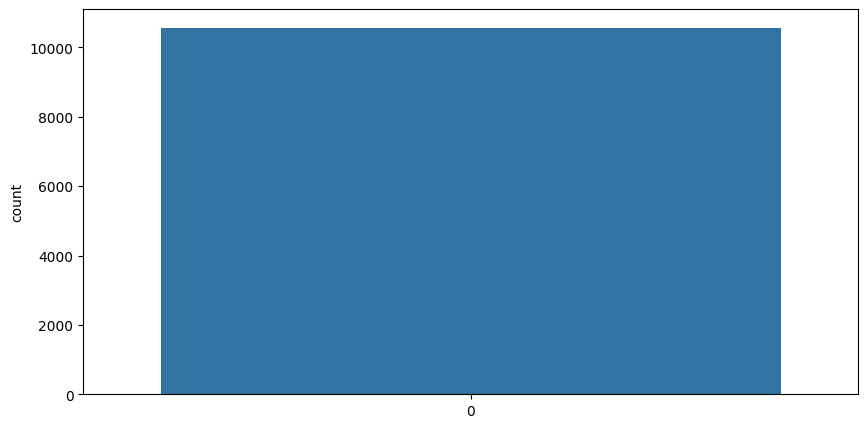

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()

In [9]:
df.describe(include='all')

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
count,10570,10570,10570,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000,10570.000000
unique,3761,10570,10570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,30-08-2017,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018,1.674740
std,NaN,NaN,NaN,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109,0.539109
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,2.000000
75%,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,2.000000


Price Sentiment
2    6380
1    3814
3     376
Name: count, dtype: int64

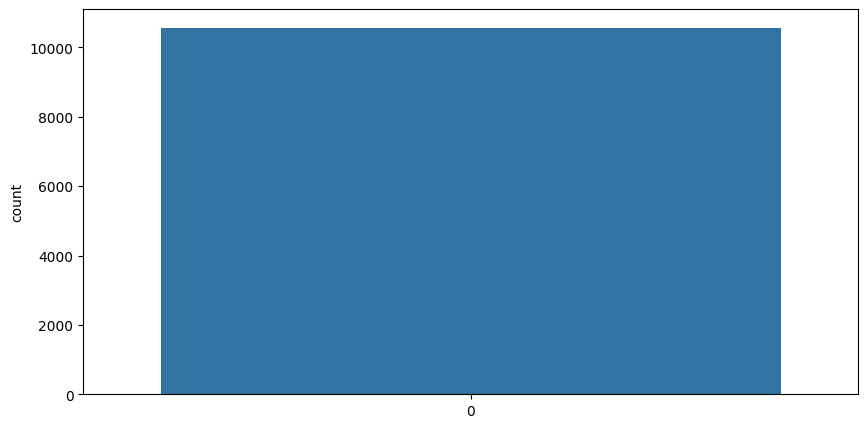

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()